In [1]:
# Jun Tu 21-732-722
# Guanda Zhao 21-716-345

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy.stats as sts

In [3]:
data_base_path = "Data/"

cormat_1h = np.load(data_base_path + "cormat_1h.npy")
cormat_1m = np.load(data_base_path + "cormat_1m.npy")

print("Loading is done")

## thread unsafe
figure_uni_index=0
def new_figure():
    global figure_uni_index
    figure_uni_index = figure_uni_index + 1
    fig = plt.figure(figure_uni_index)
    return fig


Loading is done


In [4]:
def lambda_min_max(Q):
    lambda_min = 1 + 1 / Q - 2 * math.sqrt(1/Q)
    lambda_max = 1 + 1 / Q + 2 * math.sqrt(1/Q)
    return lambda_min, lambda_max

def marcenko_pastur(Q, lambda_input):
    lambda_min, lambda_max = lambda_min_max(Q)
    probability = (Q / (2 * math.pi)) * (math.sqrt((lambda_max - lambda_input)*(lambda_input - lambda_min)) / lambda_input)
    return probability

def replace_noise(eigvals, noise, lambda_max):
    count = 0
    while count < len(noise):
        for eigval in eigvals:
            if (eigval < lambda_max):
                eigval = noise[count]
                count += 1  
    return eigvals

Text(0.5, 1.0, 'MP law for 1m')

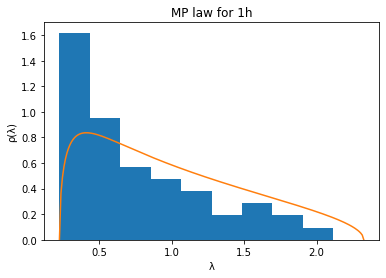

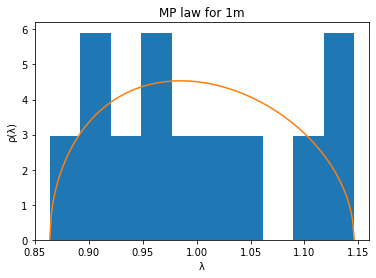

In [5]:
eigval_1h, eigvec_1h = np.linalg.eig(cormat_1h)
eigval_1m, eigvec_1m = np.linalg.eig(cormat_1m)

Q_1h = 3.6289
Q_1m = 200.8969

lambda_min_1h, lambda_max_1h = lambda_min_max(Q_1h)
lambda_min_1m, lambda_max_1m = lambda_min_max(Q_1m)

x_1h = np.arange(lambda_min_1h, lambda_max_1h, (lambda_max_1h - lambda_min_1h)/200)
x_1m = np.arange(lambda_min_1m, lambda_max_1m, (lambda_max_1m - lambda_min_1m)/200)
x_1h = np.append(x_1h, lambda_max_1h)
x_1m = np.append(x_1m, lambda_max_1m)

y_1h = [marcenko_pastur(Q_1h, x) for x in x_1h]
y_1m = [marcenko_pastur(Q_1m, x) for x in x_1m]

new_figure()
plt.hist(eigval_1h, range = (lambda_min_1h, lambda_max_1h), density = True)
plt.plot(x_1h, y_1h)
plt.xlabel('\u03BB')
plt.ylabel('\u03C1(\u03BB)')
plt.title('MP law for 1h')

new_figure()
plt.hist(eigval_1m, range = (lambda_min_1m, lambda_max_1m), density = True)
plt.plot(x_1m, y_1m)
plt.xlabel('\u03BB')
plt.ylabel('\u03C1(\u03BB)')
plt.title('MP law for 1m')

In [6]:
noise_1h = []
signal_1h = []
noise_1m = []
signal_1m = []

for eigval in eigval_1h:
    if (eigval < lambda_max_1h):
        noise_1h.append(eigval)
    else:
        signal_1h.append(eigval)
        
for eigval in eigval_1m:
    if (eigval < lambda_max_1m):
        noise_1m.append(eigval)
    else:
        signal_1m.append(eigval)
        
norm_noise_1h = [lambda_i / sum(noise_1h) * len(noise_1h) for lambda_i in noise_1h]
norm_noise_1m = [lambda_i / sum(noise_1m) * len(noise_1m) for lambda_i in noise_1m]

diagonal_1h = replace_noise(eigval_1h, norm_noise_1h, lambda_max_1h)
diagonal_1m = replace_noise(eigval_1m, norm_noise_1m, lambda_max_1m)

denoised_1h = eigvec_1h * diagonal_1h * eigvec_1h.T
denoised_1m = eigvec_1m * diagonal_1m * eigvec_1m.T

print('denoised_1h:\n', denoised_1h)
print('\n')
print('denoised_1m:\n', denoised_1m)

denoised_1h:
 [[ 1.28195872e-01 -2.99462062e-02  7.38554007e-02 ... -2.04570404e-04
   1.60179044e-04  3.91845497e-04]
 [-1.51957885e-01  1.11994831e-03  9.07077070e-04 ...  2.70965949e-04
   8.85822046e-05  7.25310309e-04]
 [ 5.86436009e-01  1.41938800e-03  2.43288881e-02 ... -1.28843561e-04
  -1.25758770e-03 -1.98592859e-04]
 ...
 [-7.42309453e-02  1.93765065e-02 -5.88798287e-03 ...  3.25470325e-03
  -4.19933187e-06  1.46723556e-03]
 [ 5.95647252e-02  6.49155140e-03 -5.88956686e-02 ... -4.30349651e-06
   1.63547107e-03 -1.78947600e-04]
 [ 1.48955474e-01  5.43355450e-02 -9.50751163e-03 ...  1.53708988e-03
  -1.82929624e-04  4.17681997e-04]]


denoised_1m:
 [[ 2.14868731e-01 -7.35039604e-03 -1.53811532e-02 ... -2.31679673e-03
  -2.11383612e-04  1.88534948e-03]
 [-7.23418123e-02  6.43341190e-03 -1.37720989e-02 ... -1.76171522e-03
   2.03042797e-03  1.10435875e-02]
 [-1.72257766e-01 -1.56715301e-02  5.41165538e-03 ... -8.80047638e-03
   9.82993630e-03 -6.69149025e-04]
 ...
 [-1.52593971e